In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pycountry as pc
import textwrap
from adjustText import adjust_text

In [4]:
def fmt(x):
    if x < 1:
        return f"{x:.2f}"
    return format(x, ".3g")

def get_iso3(name):
    try:
        return pc.countries.lookup(name).alpha_3
    except LookupError:
        return None
    
def fill_under(ax, x, y, **kwargs):
    ax.fill_between(x, y, alpha=0.25, **kwargs)

def scatter(ax, x, y, **kwargs):
    ax.scatter(x, y, s=75, **kwargs)


In [5]:
plt.rcParams.update({
    # Figure
    "figure.figsize": (8, 6),
    "figure.dpi": 120,
    "figure.autolayout": True,
    "figure.facecolor": "none",

    # Fonts
    "font.family": "sans-serif",
    "font.sans-serif": ["DejaVu Sans"],
    "font.size": 11,
    "axes.titlesize": 14,
    "axes.labelsize": 12,

    # Axes
    "axes.facecolor": "none",
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.linewidth": 0.8,
    "axes.edgecolor": "#333333",
    "axes.grid": True,
    "axes.axisbelow": True,

    # Grid
    "grid.color": "#f1f1f1",
    "grid.linestyle": "-",
    "grid.linewidth": 0.5,
    "grid.alpha": 0,

    # Ticks
    "xtick.color": "#333333",
    "ytick.color": "#333333",
    "xtick.major.size": 4,
    "ytick.major.size": 4,

    # Legend
    "legend.frameon": False,
    "legend.fontsize": 10,

    # Lines
    "lines.linewidth": 3,
    "lines.markersize": 6,
    "lines.markeredgewidth": 0.8,

    # Filled areas under lines
    "patch.edgecolor": "none",

    # Scatter plots
    "lines.markersize": 7,

    "axes.prop_cycle": plt.cycler(color=[
        "#5DA9E9",
        "#FF8686",
        "#6BCB77",
        "#B39CD0",
        "#FFC069",
        "#4DCCBD"
    ]),
})


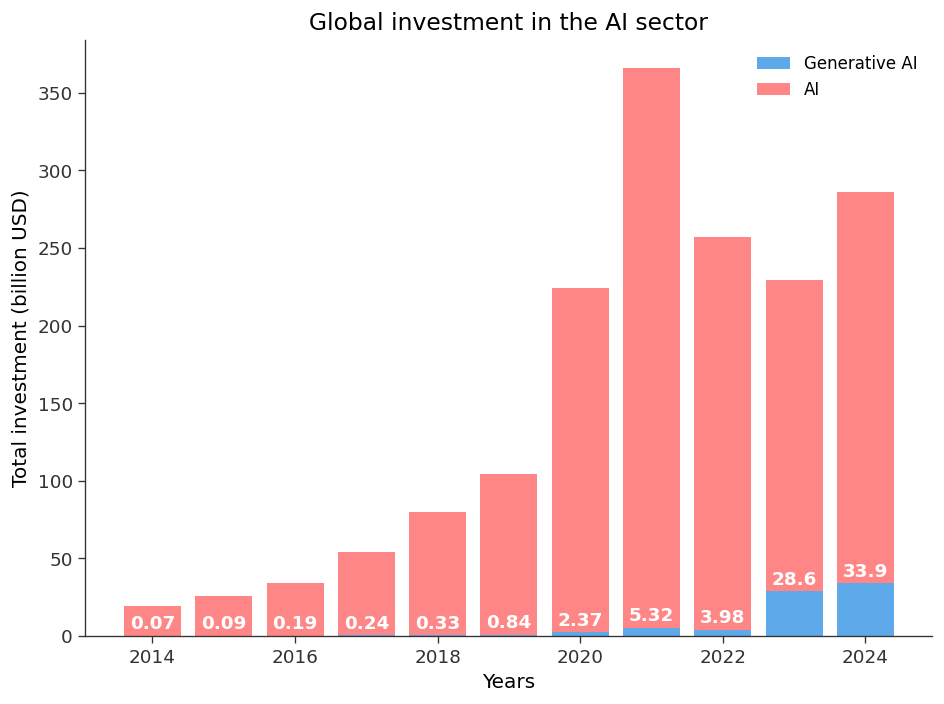

In [6]:
df1 = pd.read_csv("datasets/economy/data/fig-431.csv")
df2 = pd.read_csv("datasets/economy/data/fig-433.csv")

df1 = df1.rename(columns={df1.columns[0]: "year", df1.columns[1]: "type", df1.columns[2]: "amount"})
df2 = df2.rename(columns={df2.columns[0]: "year", df2.columns[1]: "amount"})

df1 = df1.drop(columns=["type"])

df1 = df1[df1["year"] >= 2014]
df2 = df2[df2["year"] >= 2014]
df1 = df1.groupby("year", as_index=False)["amount"].sum()

x = df1["year"].to_numpy()
y1 = df1["amount"].to_numpy()
y2 = df2["amount"].to_numpy()

fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.bar(x, y2)
ax1.bar(x, y1, bottom=y2)
ax1.set_xlabel("Years")
ax1.set_ylabel("Total investment (billion USD)")

# Top bar text
for i in range(len(x)):
    ax1.text(x[i], y2[i] + 0.05 * max(y2), str(fmt(y2[i])), ha="center", va="bottom", color="w", fontweight="bold")

ax1.legend(["Generative AI", "AI"])
plt.title("Global investment in the AI sector")
plt.show()

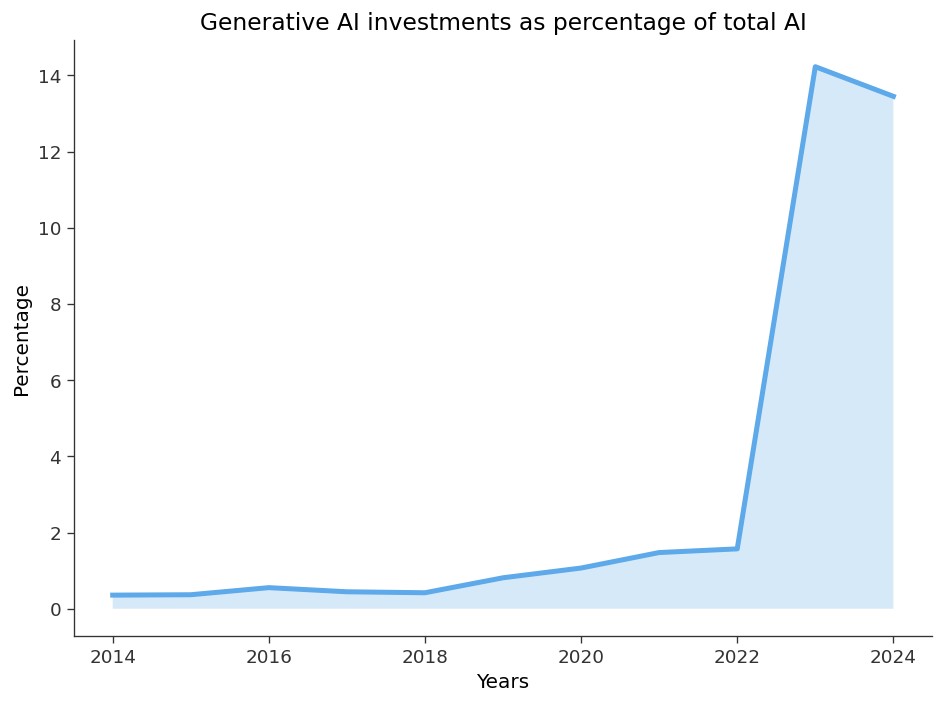

In [7]:
df1 = pd.read_csv("datasets/economy/data/fig-431.csv")
df2 = pd.read_csv("datasets/economy/data/fig-433.csv")

df1 = df1.rename(columns={df1.columns[0]: "year", df1.columns[1]: "type", df1.columns[2]: "amount"})
df2 = df2.rename(columns={df2.columns[0]: "year", df2.columns[1]: "amount"})

df1 = df1.drop(columns=["type"])

df1 = df1[df1["year"] >= 2014]
df2 = df2[df2["year"] >= 2014]
df1 = df1.groupby("year", as_index=False)["amount"].sum()

x = df1["year"].to_numpy()
y = (df2["amount"] * 100) / df1["amount"]

fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.plot(x, y)
fill_under(ax1, x, y)
ax1.set_xlabel("Years")
ax1.set_ylabel("Percentage")

plt.title("Generative AI investments as percentage of total AI")
plt.show()

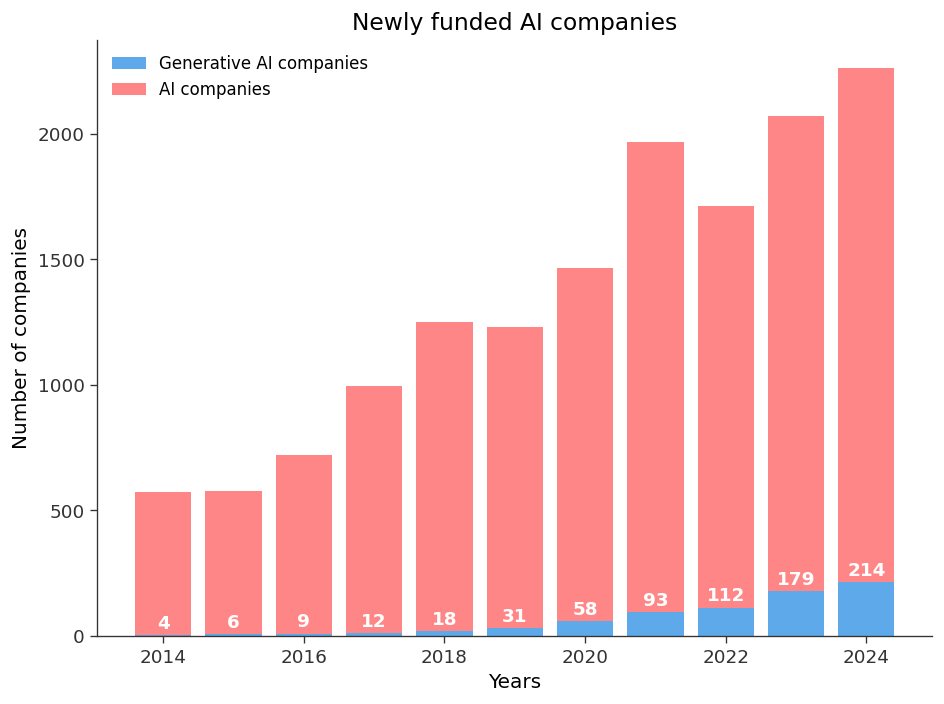

In [8]:
df1 = pd.read_csv("datasets/economy/data/fig-434.csv")
df2 = pd.read_csv("datasets/economy/data/fig-435.csv")

df1 = df1.rename(columns={df1.columns[0]: "year", df1.columns[1]: "number_of_companies"})
df2 = df2.rename(columns={df2.columns[0]: "year", df2.columns[1]: "number_of_companies"})

df1 = df1[df1["year"] >= 2014]
df2 = df2[df2["year"] >= 2014]

x = df1["year"].to_numpy()
y1 = df1["number_of_companies"].to_numpy()
y2 = df2["number_of_companies"].to_numpy()

fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.bar(x, y2)
ax1.bar(x, y1, bottom=y2)
ax1.set_xlabel("Years")
ax1.set_ylabel("Number of companies")

# Top bar text
for i in range(len(x)):
    ax1.text(x[i], y2[i] + 0.05 * max(y2), str(fmt(y2[i])), ha="center", va="bottom", color="w", fontweight="bold")

ax1.legend(["Generative AI companies", "AI companies"])
plt.title("Newly funded AI companies")
plt.show()

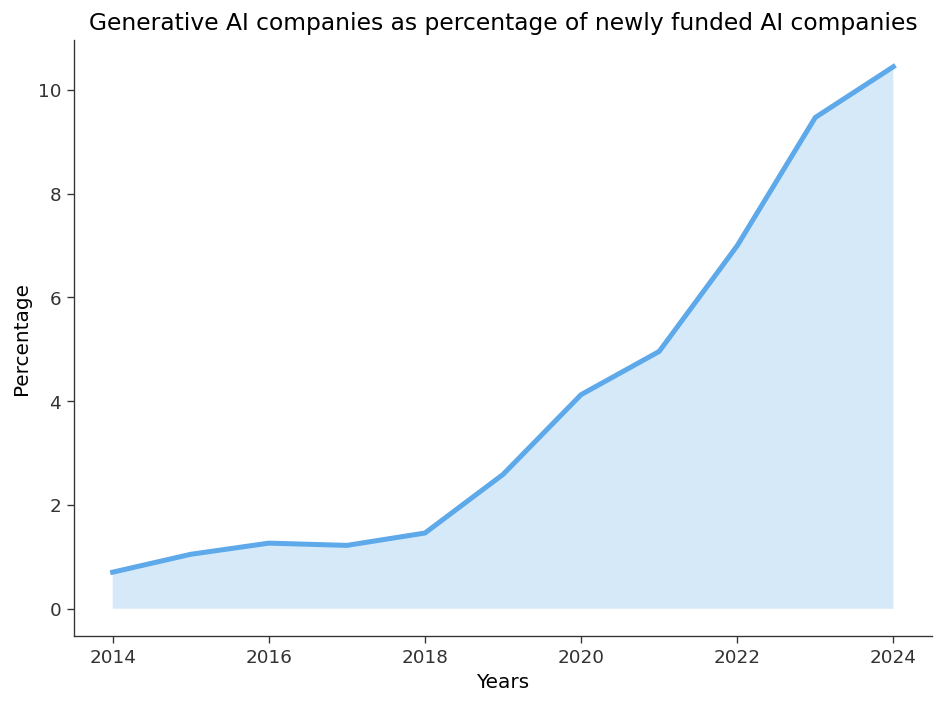

In [9]:
df1 = pd.read_csv("datasets/economy/data/fig-434.csv")
df2 = pd.read_csv("datasets/economy/data/fig-435.csv")

df1 = df1.rename(columns={df1.columns[0]: "year", df1.columns[1]: "number_of_companies"})
df2 = df2.rename(columns={df2.columns[0]: "year", df2.columns[1]: "number_of_companies"})

df1 = df1[df1["year"] >= 2014]
df2 = df2[df2["year"] >= 2014]
df1 = df1.groupby("year", as_index=False)["number_of_companies"].sum()

x = df1["year"].to_numpy()
y = (df2["number_of_companies"] * 100) / df1["number_of_companies"]

fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.plot(x, y)
fill_under(ax1, x, y)
ax1.set_xlabel("Years")
ax1.set_ylabel("Percentage")

plt.title("Generative AI companies as percentage of newly funded AI companies")
plt.show()

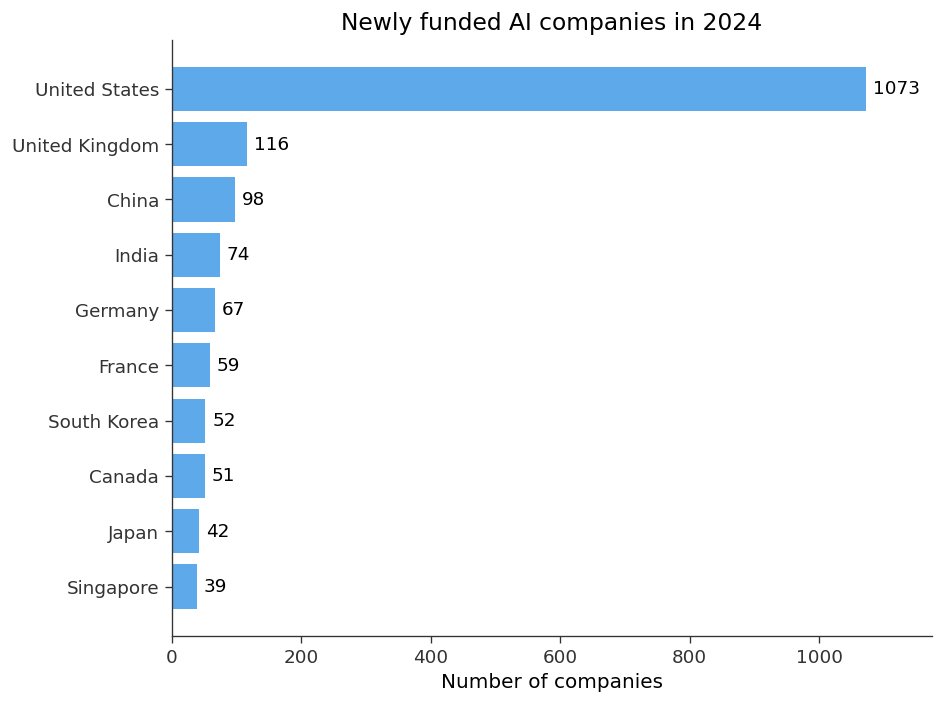

In [10]:
df = pd.read_csv("datasets/economy/data/fig-4312.csv")
df = df.rename(columns={df.columns[0]: "country", df.columns[1]: "number_of_companies"})

x = df["number_of_companies"][:10].to_numpy()
y = df["country"][:10].to_numpy()

x = np.flip(x)
y = np.flip(y)

fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.barh(y, x)
ax1.set(xlim=(0, 1175))
ax1.set_xlabel("Number of companies")
#ax1.set_ylabel("Country")

# Top bar text
for i in range(len(y)):
    ax1.text(x[i] + 0.01 * max(x), y[i], str(x[i]), ha="left", va="center")

plt.title("Newly funded AI companies in 2024")
plt.show()

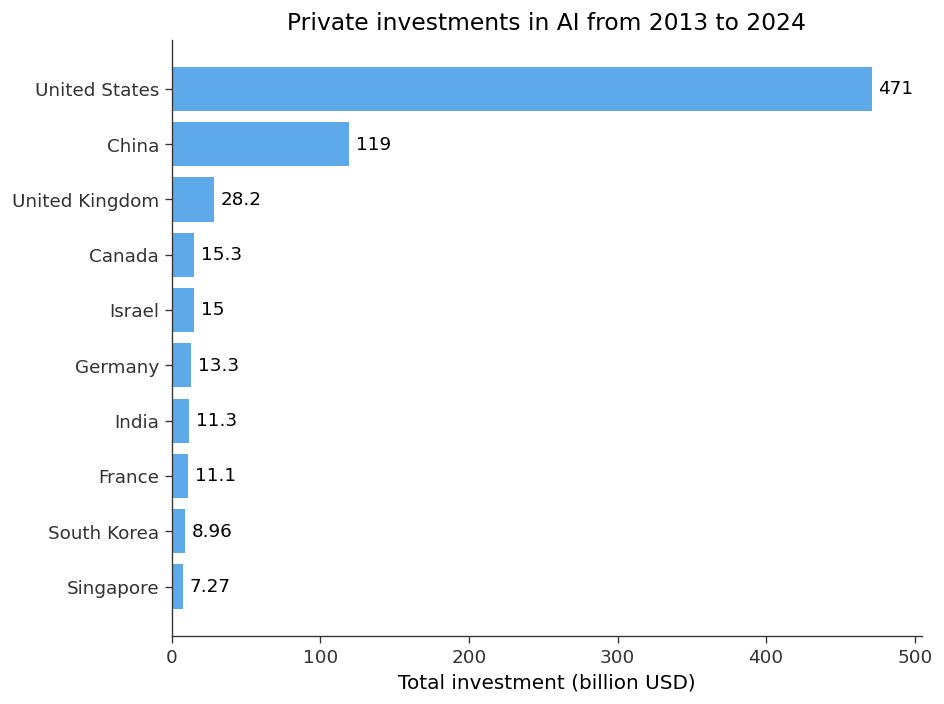

In [11]:
df = pd.read_csv("datasets/economy/data/fig-439.csv")
df = df.rename(columns={df.columns[0]: "country", df.columns[1]: "number_of_companies"})

x = df["number_of_companies"][:10].to_numpy()
y = df["country"][:10].to_numpy()

x = np.flip(x)
y = np.flip(y)

fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.barh(y, x)
ax1.set(xlim=(0, 505))
ax1.set_xlabel("Total investment (billion USD)")
#ax1.set_ylabel("Country")

# Top bar text
for i in range(len(y)):
    ax1.text(x[i] + 0.01 * max(x), y[i], str(fmt(x[i])), ha="left", va="center")

plt.title("Private investments in AI from 2013 to 2024")
plt.show()

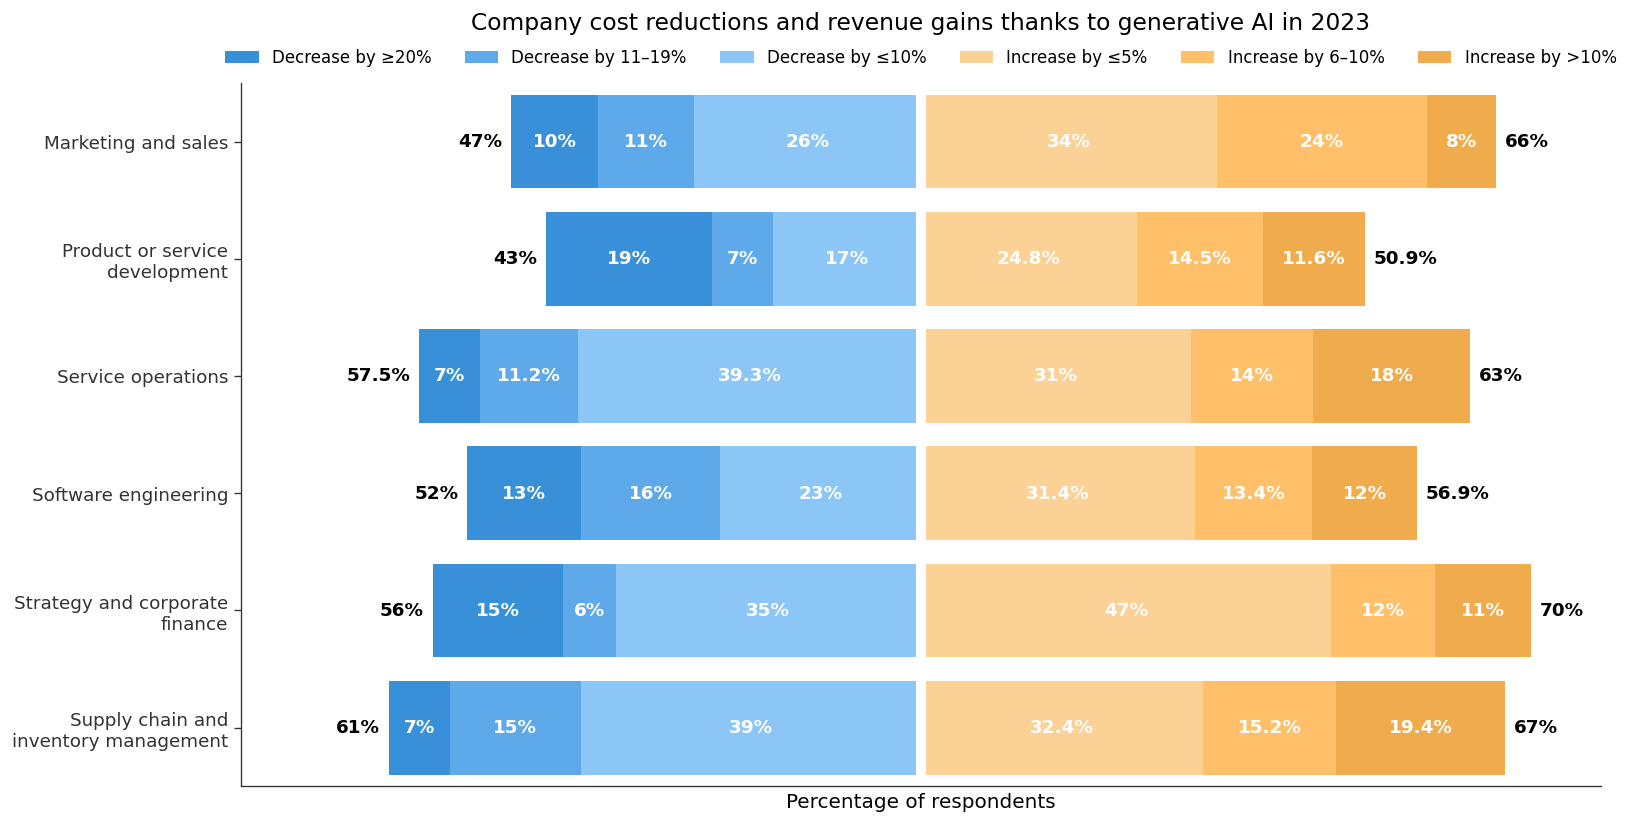

In [29]:
df = pd.read_csv("datasets/economy/data/fig-446.csv")
df["value"] = df["% of respondents"].str.replace("%", "").astype(float)

dec_cats = ["Decrease by ≤10%", "Decrease by 11–19%", "Decrease by ≥20%"]
inc_cats = ["Increase by ≤5%", "Increase by 6–10%", "Increase by >10%"]

colors = {
    "Decrease by ≥20%": "#3890D8",
    "Decrease by 11–19%": "#5DA9E9",
    "Decrease by ≤10%": "#8BC6F6",
    "Increase by ≤5%": "#FCD196",
    "Increase by 6–10%": "#FFC069",
    "Increase by >10%": "#F0AC4C",
}

dec = df[df["Category"].isin(dec_cats)]
inc = df[df["Category"].isin(inc_cats)]

dec_pivot = dec.pivot(index="Function", columns="Category", values="value").fillna(0)
inc_pivot = inc.pivot(index="Function", columns="Category", values="value").fillna(0)

# Reorder columns to match the order in dec_cats and inc_cats
dec_pivot = dec_pivot[dec_cats]
inc_pivot = inc_pivot[inc_cats]
functions = dec_pivot.index
dec_pivot = dec_pivot.loc[functions]
inc_pivot = inc_pivot.loc[functions]
functions = functions[::-1]
dec_pivot = dec_pivot.loc[functions]
inc_pivot = inc_pivot.loc[functions]

functions = [ "\n".join(textwrap.wrap(q, width=25)) for q in functions ]

fig, ax = plt.subplots(figsize=(14, 7))

# Compute cumulative positions
dec_cum = dec_pivot.cumsum(axis=1)
inc_cum = inc_pivot.cumsum(axis=1)

# Negative direction for decreases
for col in dec_cats:
    widths = dec_pivot[col]
    starts = -(dec_cum[col] - widths)
    ax.barh(functions, -widths, left=starts, label=col, color=colors[col])
    for i, (start, w) in enumerate(zip(starts, widths)):
        if w > 0:
            ax.text(start - w/2, functions[i], str(fmt(w)) + "%", ha="center", va="center", color="white", fontweight="bold")

# Add total percentage at the end of decrease bars
dec_totals = dec_pivot.sum(axis=1)
for i, (func, total) in enumerate(zip(functions, dec_totals)):
    if total > 0:
        ax.text(-total - 1, func, str(fmt(total)) + "%", ha="right", va="center", fontweight="bold")

# Positive direction for increases
for col in inc_cats:
    widths = inc_pivot[col]
    starts = (inc_cum[col] - widths)
    ax.barh(functions, widths, left=starts, label=col, color=colors[col])
    for i, (start, w) in enumerate(zip(starts, widths)):
        if w > 0:
            ax.text(start + w/2, functions[i], str(fmt(w)) + "%", ha="center", va="center", color="white", fontweight="bold")
            
# Add total percentage at the end of increase bars
inc_totals = inc_pivot.sum(axis=1)
for i, (func, total) in enumerate(zip(functions, inc_totals)):
    if total > 0:
        ax.text(total + 1, func, str(fmt(total)) + "%", ha="left", va="center", fontweight="bold")

# Set ylimits to control bar spacing
ax.set_ylim(-0.5, len(functions) - 0.5)

# Draw white divider line stopping just before the edges
ax.plot([0, 0], [-0.4, len(functions) - 0.6], color="white", linewidth=6, zorder=10)

ax.set_xlabel("Percentage of respondents", x=0.5)
ax.set_xlim(-78, 78)
ax.set_xticks([])
ax.set_title("Company cost reductions and revenue gains thanks to generative AI in 2023", pad=32)

handles, labels = ax.get_legend_handles_labels()
handles = handles[2::-1] + handles[3:]
labels = labels[2::-1] + labels[3:]
ax.legend(handles, labels, ncol=6, loc="upper center", bbox_to_anchor=(0.5, 1.07))

plt.tight_layout()
plt.show()

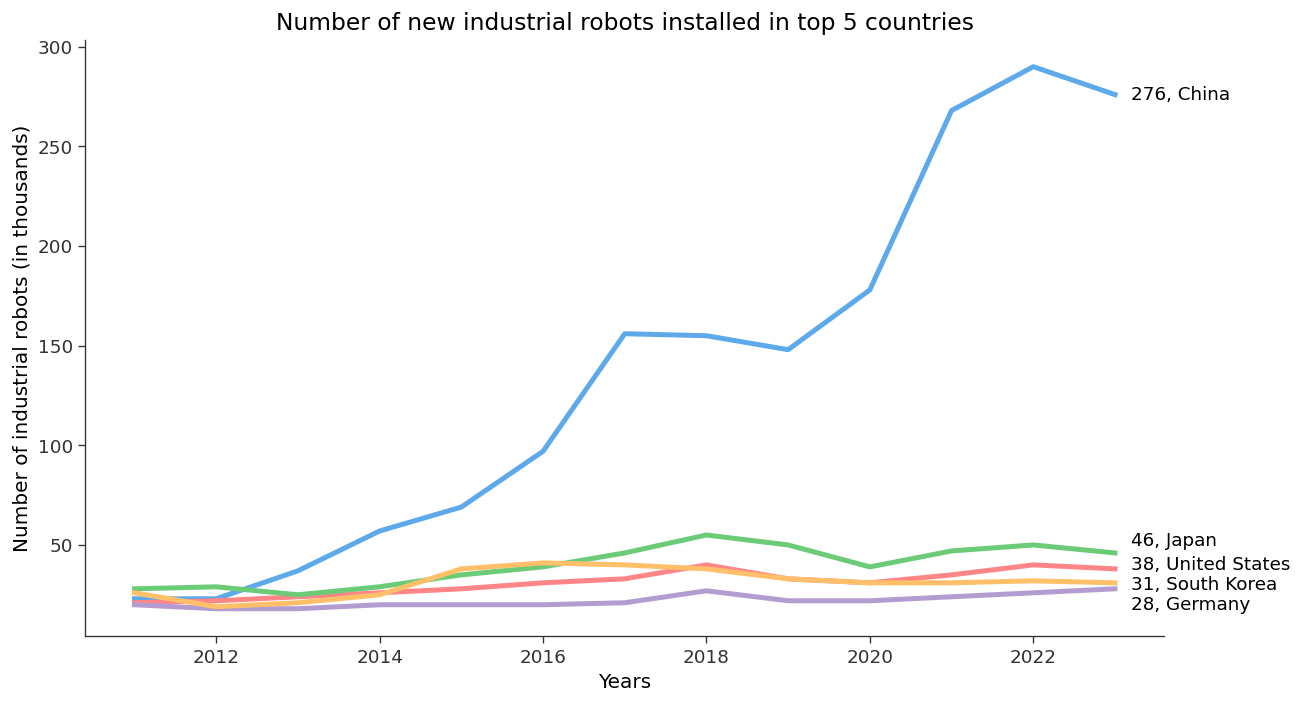

In [13]:
df = pd.read_csv("datasets/economy/data/fig-455.csv")

df = df.rename(columns={df.columns[0]: "year", df.columns[1]: "number_of_robots", df.columns[2]: "country"})

x = df["year"].unique()

fig, ax1 = plt.subplots(figsize=(11, 6))

offsets = {"China": 0, "United States": 2, "Japan": 6, "Germany": -8, "South Korea": -1}

for country in [("China"), ("United States"), ("Japan"), ("Germany"), ("South Korea")]:
    sub = df[df["country"] == country]
    values = sub["number_of_robots"].to_numpy()

    ax1.plot(x, values, label=country)

    last_year = x[-1]
    last_value = values[-1]

    ax1.text(last_year + 0.2, last_value + offsets[country], f"{last_value}, {country}", va="center", ha="left")

ax1.set_xlabel("Years")
ax1.set_ylabel("Number of industrial robots (in thousands)")

plt.title("Number of new industrial robots installed in top 5 countries")
plt.show()

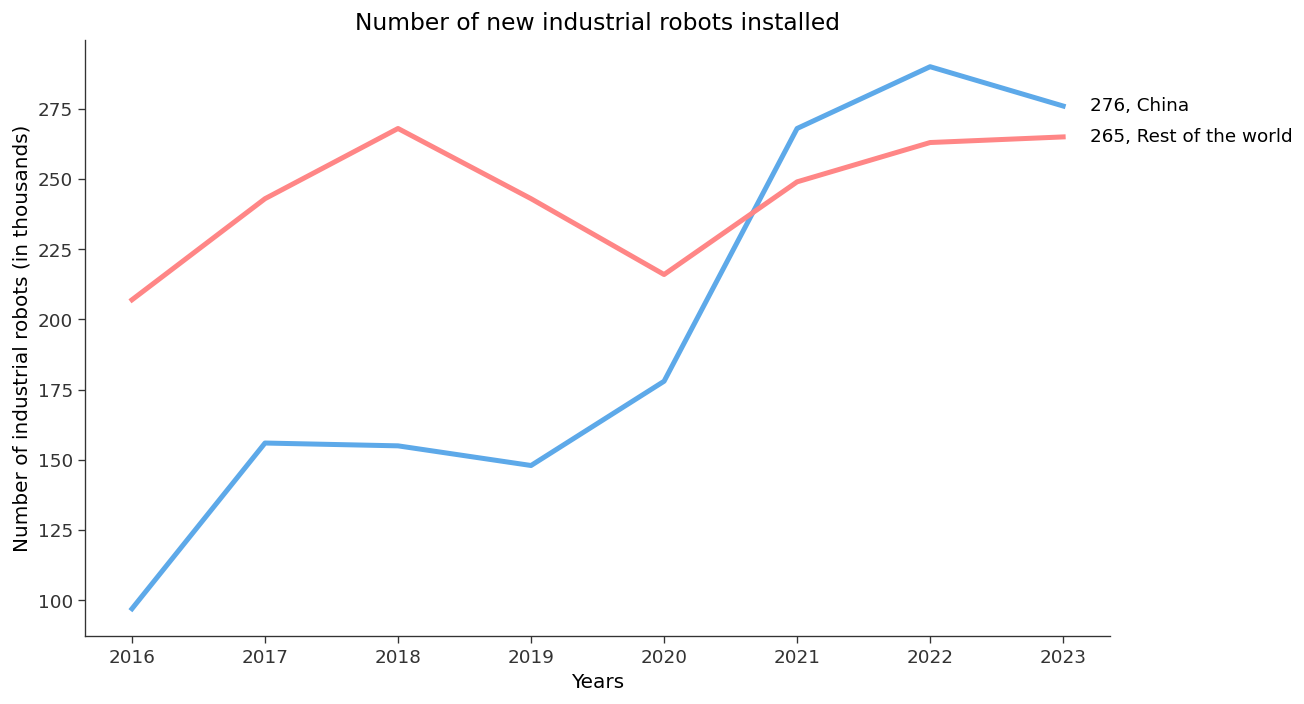

In [14]:
df = pd.read_csv("datasets/economy/data/fig-456.csv")

df = df.rename(columns={df.columns[0]: "year", df.columns[1]: "number_of_robots", df.columns[2]: "country"})

x = df["year"].unique()

fig, ax1 = plt.subplots(figsize=(11, 6))

offsets = {"China": 0, "Rest of the world": 0}

for country in [("China"), ("Rest of the world")]:
    sub = df[df["country"] == country]
    values = sub["number_of_robots"].to_numpy()

    ax1.plot(x, values, label=country)

    last_year = x[-1]
    last_value = values[-1]

    ax1.text(last_year + 0.2, last_value + offsets[country], f"{last_value}, {country}", va="center", ha="left")

ax1.set_xlabel("Years")
ax1.set_ylabel("Number of industrial robots (in thousands)")

plt.title("Number of new industrial robots installed")
plt.show()

# Policy and Governance

In [28]:
df = pd.read_csv("datasets/policy-and-governance/data/fig-621.csv")
df = df.rename(columns={df.columns[0]: "country", df.columns[1]: "number_of_ai_bills"})
df["iso3"] = [get_iso3(name) for name in df["country"]]

# Create discrete bins matching the legend in the image
bins = [0, 1, 6, 11, 16, 31]  # 0, 1-5, 6-10, 11-15, 16-30
labels = ["0", "1–5", "6–10", "11–15", "16-30"]
df["Legend"] = pd.cut(df["number_of_ai_bills"], bins=bins, labels=labels, right=False, include_lowest=True)

# Define colors matching the image (light to dark blue)
color_discrete_map = {
    "0": "#E0EFFB",
    "1–5": "#9ECAEE",
    "6–10": "#5DA9E9",
    "11–15": "#308BD6",
    "16-30": "#125286"
}

fig = px.choropleth(
    df,
    locations="iso3",
    locationmode="ISO-3",
    color="Legend",
    color_discrete_map=color_discrete_map,
    category_orders={"Legend": labels},
    hover_name="country",
    hover_data={"number_of_ai_bills": True, "Legend": False, "iso3": False},
    title="Number of AI-related bills passed into law by country from 2016 to 2024"
)

fig.show()

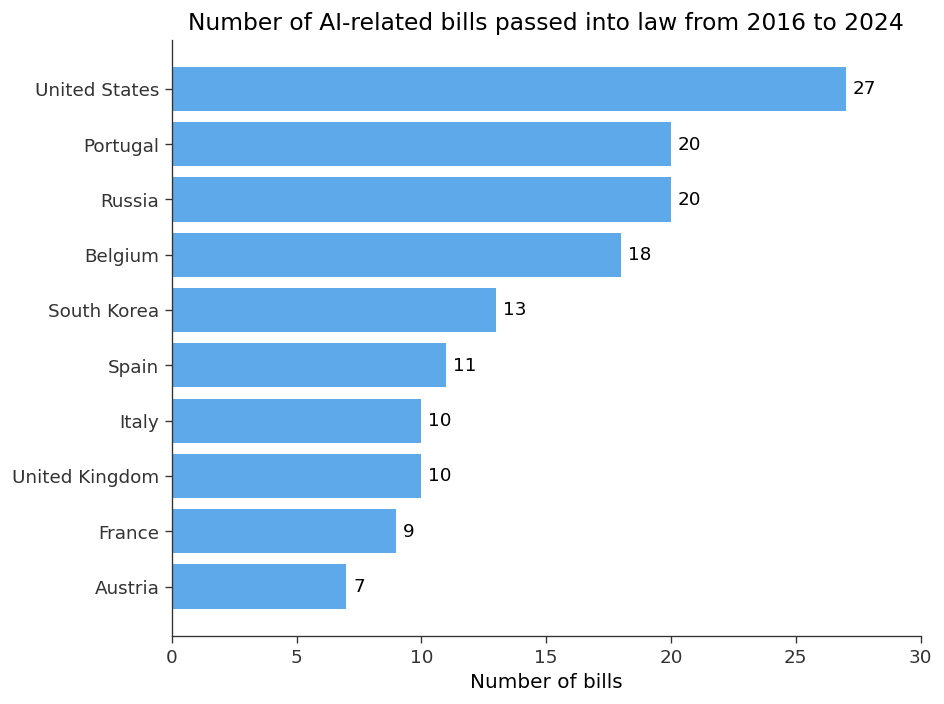

In [16]:
df = pd.read_csv("datasets/policy-and-governance/data/fig-624.csv")
df = df.rename(columns={df.columns[0]: "number_of_bills", df.columns[1]: "country"})

x = df["number_of_bills"][:10].to_numpy()
y = df["country"][:10].to_numpy()

x = np.flip(x)
y = np.flip(y)

fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.barh(y, x)
ax1.set(xlim=(0, 30))
ax1.set_xlabel("Number of bills")
#ax1.set_ylabel("Country")

# Top bar text
for i in range(len(y)):
    ax1.text(x[i] + 0.01 * max(x), y[i], str(fmt(x[i])), ha="left", va="center")

plt.title("Number of AI-related bills passed into law from 2016 to 2024")
plt.show()

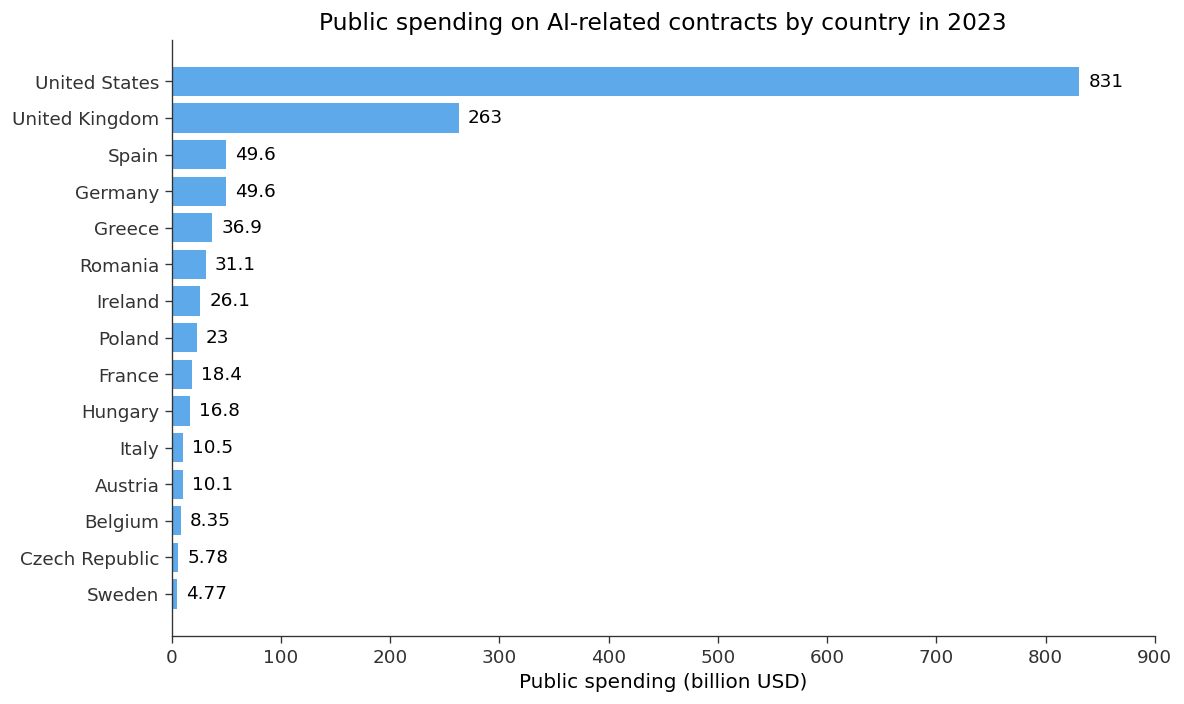

In [17]:
df = pd.read_csv("datasets/policy-and-governance/data/fig-635.csv")
df = df.rename(columns={df.columns[0]: "publis_spending", df.columns[1]: "country"})

x = df["publis_spending"][:15].to_numpy()
y = df["country"][:15].to_numpy()

x = np.flip(x)
y = np.flip(y)

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.barh(y, x)
ax1.set(xlim=(0, 900))
ax1.set_xlabel("Public spending (billion USD)")
#ax1.set_ylabel("Country")

# Top bar text
for i in range(len(y)):
    ax1.text(x[i] + 0.01 * max(x), y[i], str(fmt(x[i])), ha="left", va="center")

plt.title("Public spending on AI-related contracts by country in 2023")
plt.show()

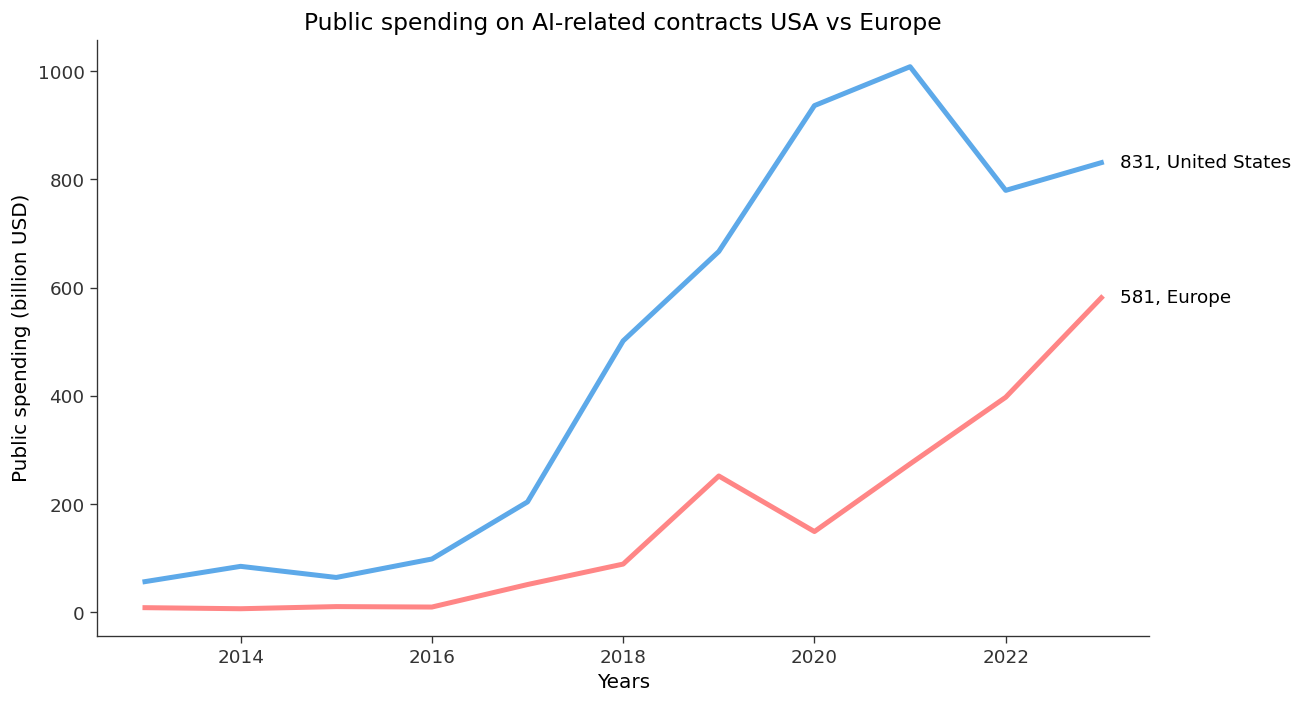

In [18]:
df = pd.read_csv("datasets/policy-and-governance/data/fig-636.csv")

df = df.rename(columns={df.columns[0]: "year", df.columns[1]: "number_of_robots", df.columns[2]: "country"})

x = df["year"].unique()

fig, ax1 = plt.subplots(figsize=(11, 6))

offsets = {"United States": 0, "Europe": 0}

for country in [("United States"), ("Europe")]:
    sub = df[df["country"] == country]
    values = sub["number_of_robots"].to_numpy()

    ax1.plot(x, values, label=country)

    last_year = x[-1]
    last_value = values[-1]

    ax1.text(last_year + 0.2, last_value + offsets[country], f"{fmt(last_value)}, {country}", va="center", ha="left")

ax1.set_xlabel("Years")
ax1.set_ylabel("Public spending (billion USD)")

plt.title("Public spending on AI-related contracts USA vs Europe")
plt.show()

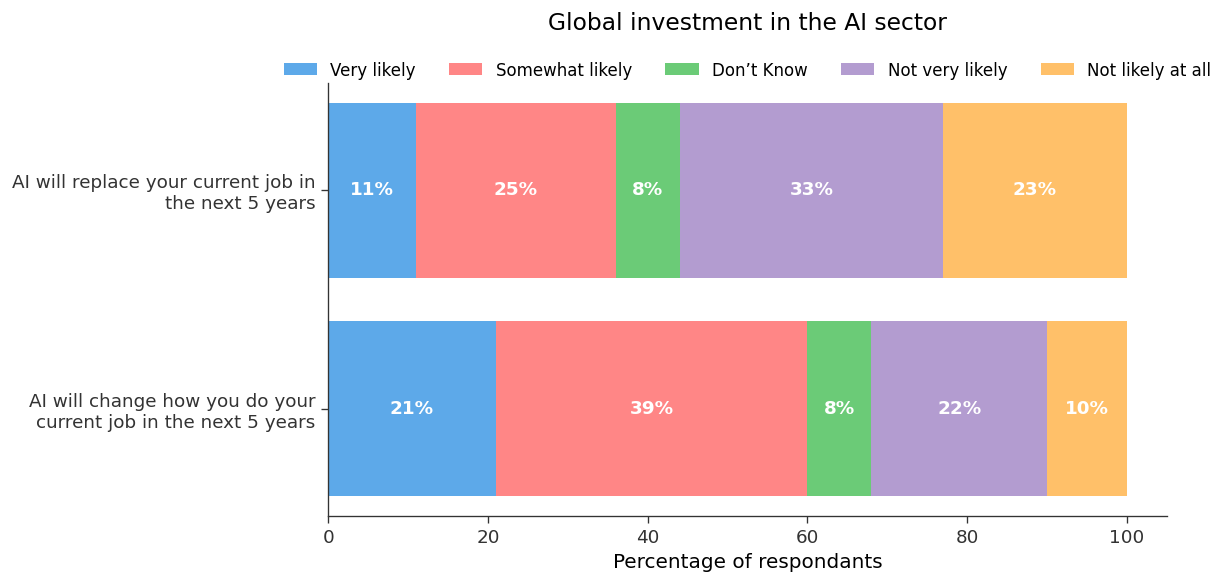

In [35]:
df = pd.read_csv("datasets/public-opinion/data/fig-817.csv")

df = df.rename(columns={df.columns[0]: "response", df.columns[1]: "question", df.columns[2]: "amount"})

x = list()
y = df["question"].unique()
y = [ "\n".join(textwrap.wrap(q, width=35)) for q in df["question"].unique() ]

t = ["Very likely", "Somewhat likely", "Don’t Know", "Not very likely", "Not likely at all"]

for i in range(len(t)):
    series = df[df["response"] == t[i]]["amount"]
    cleaned = series.str.rstrip("%").astype(float).astype(int)
    x.append(cleaned.to_numpy())

fig, ax = plt.subplots(figsize=(10, 5))

for i in range(len(x)):
    if i == 0:
        left = np.zeros_like(x[i])
    else:
        left = np.sum(x[:i], axis=0)

    ax.barh(y, x[i], left=left)
    
    for k, val in enumerate(x[i]):
        xpos = left[k] + val - 1
        ax.text(left[k] + (val / 2), y[k], f"{fmt(val)}%", ha="center", va="center", fontweight="bold", color="white")

ax.set_xlabel("Percentage of respondants")

ax.set_title("Global investment in the AI sector", pad=32)

ax.legend(["Very likely", "Somewhat likely", "Don’t Know", "Not very likely", "Not likely at all"], ncol=5, loc="upper center", bbox_to_anchor=(0.5, 1.085))
plt.show()

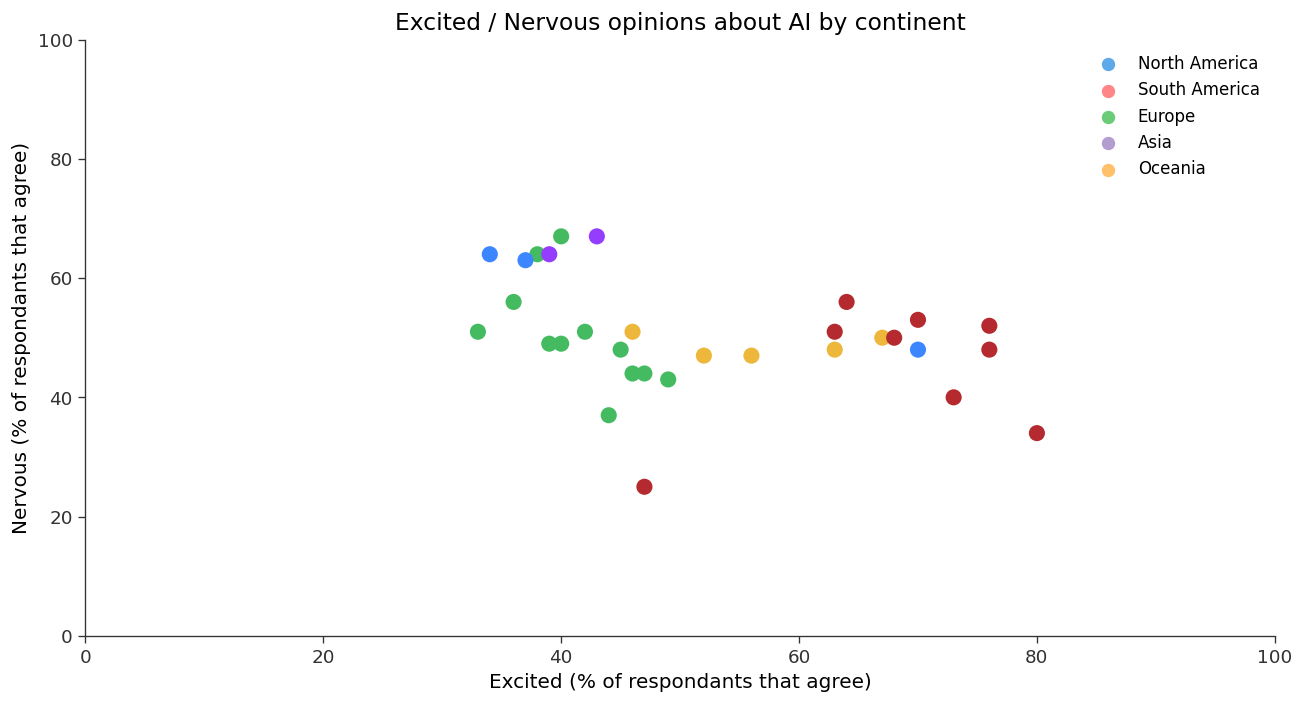

In [20]:
df = pd.read_csv("datasets/public-opinion/data/fig-814.csv")
df = df.rename(columns={df.columns[0]: "statement", df.columns[1]: "country", df.columns[2]: "respondant_percentage"})

# Remapping countries to continents in order to remove labels
country_to_continent = {
    "Global": "Global",
    "China": "Asia",
    "Indonesia": "Asia",
    "Thailand": "Asia",
    "Mexico": "North America",
    "Peru": "South America",
    "Turkey": "Asia",
    "Singapore": "Asia",
    "South Korea": "Asia",
    "Colombia": "South America",
    "India": "Asia",
    "Malaysia": "Asia",
    "Argentina": "South America",
    "Brazil": "South America",
    "Hungary": "Europe",
    "Chile": "South America",
    "Italy": "Europe",
    "Spain": "Europe",
    "Poland": "Europe",
    "Germany": "Europe",
    "New Zealand": "Oceania",
    "Ireland": "Europe",
    "Netherlands": "Europe",
    "Great Britain": "Europe",
    "Switzerland": "Europe",
    "Australia": "Oceania",
    "United States": "North America",
    "France": "Europe",
    "Belgium": "Europe",
    "Japan": "Asia",
    "Canada": "North America",
    "Sweden": "Europe"
}

short_statement = {
    "Products and services using  artificial intelligence  make me excited": "excited",
    "Products and services using artificial intelligence make me nervous": "nervous"
}

df["country"] = df["country"].map(country_to_continent)
df["statement"] = df["statement"].map(short_statement)

continent_color = {
    "North America": "#3C87FF",
    "South America": "#ECB73A",
    "Europe": "#45BB61",
    "Asia": "#B42A2E",
    "Oceania": "#943DFF"
}

excited = df[df["statement"] == "excited"]
nervous = df[df["statement"] == "nervous"]

# Transform percentages strings into integers
x = excited["respondant_percentage"].to_numpy()
x = [int(float(i.strip('%'))) for i in x]

y = nervous["respondant_percentage"].to_numpy()
y = [int(float(i.strip('%'))) for i in y]

labels = excited["country"]
colors = labels.map(continent_color)

fig, ax1 = plt.subplots(figsize=(11, 6))
scatter(ax1, x, y, color=colors)
ax1.set(xlim=(0, 100), ylim=(0, 100))

ax1.set_xlabel("Excited (% of respondants that agree)")
ax1.set_ylabel("Nervous (% of respondants that agree)")

for continent, color in continent_color.items():
    ax1.scatter([], [], label=continent)

ax1.legend()

plt.title("Excited / Nervous opinions about AI by continent")
plt.show()

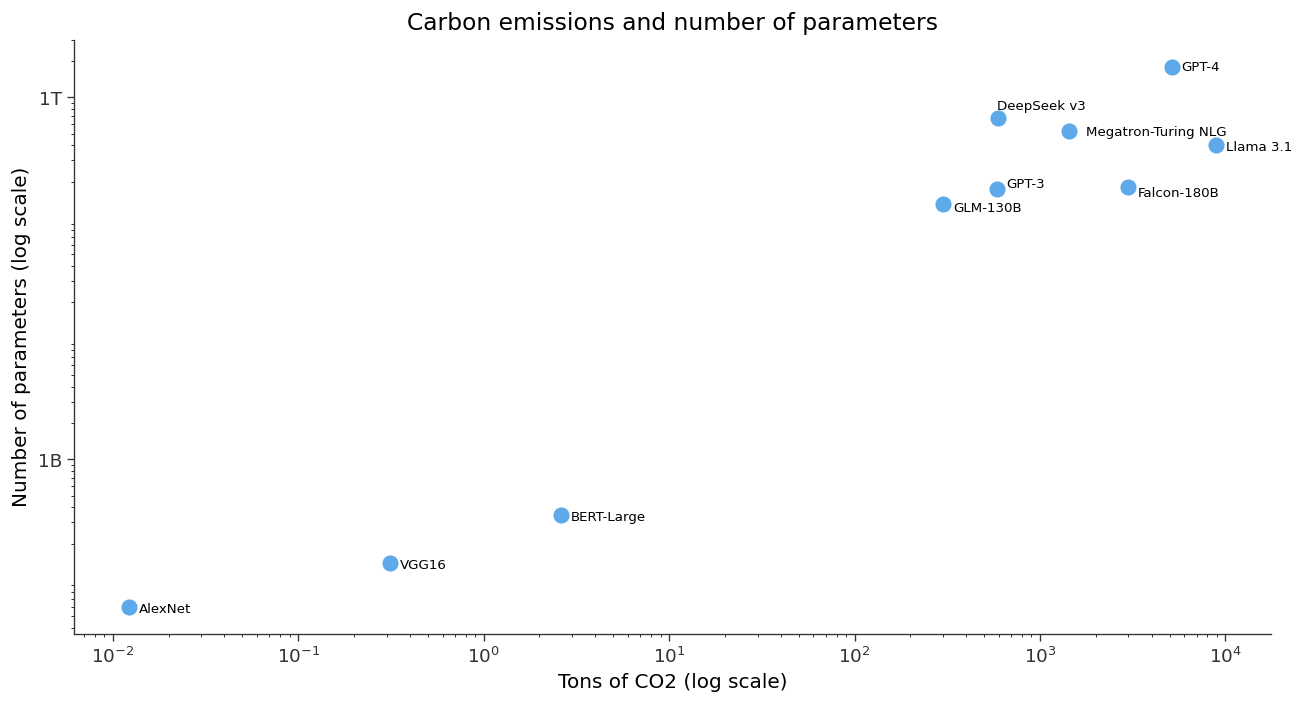

In [21]:
df = pd.read_csv("datasets/research-and-development/data/fig-148.csv")
df = df.rename(columns={df.columns[0]: "model", df.columns[1]: "year", df.columns[2]: "co2", df.columns[3]: "parameters"})

x = df["co2"]
y = df["parameters"]

fig, ax = plt.subplots(figsize=(11, 6))

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlabel("Tons of CO2 (log scale)")
ax.set_ylabel("Number of parameters (log scale)")

ax.set_yticks([1e9, 1e12])
ax.set_yticklabels(["1B", "1T"])

scatter(ax, x, y)

df_lab = df.nlargest(10, "parameters")

texts = []
for _, row in df.iterrows():
    texts.append(
        ax.text(
            row["co2"] * 1.1,
            row["parameters"],
            row["model"],
            fontsize=8,
            va="center"
        )
    )

adjust_text(
    texts,
    x=df["co2"],
    y=df["parameters"],
    ax=ax,
    ensure_inside_axes=False,
    only_move={'points': 'xy', 'text': 'xy'},
    expand_points=(1.3, 1.5),
    expand_text=(1.3, 1.5),
    force_points=0.5,
    force_text=0.5,
)

plt.title("Carbon emissions and number of parameters")
plt.show()